In [32]:
#inport panda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
#read the csv file
df = pd.read_csv('datos-17001.csv',delimiter=';')

In [33]:
#define X and Y sets
X = df[['Sensor_O3','Temp','RelHum']]
Y = df['RefSt']

#split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=1)

print(X_train,Y_train)

     Sensor_O3   Temp  RelHum
731   314.7927  39.33   25.07
716    30.1273  18.13   45.30
640   681.9790  33.53   28.00
804    37.2989  21.00   34.00
737   359.4070  31.50   29.10
..         ...    ...     ...
767    42.9213  29.07   30.23
72    151.4577  25.00   51.83
908    29.7337  19.10   66.73
235    33.6453  21.00   72.37
37     27.2787  18.87   78.37

[700 rows x 3 columns] 731     97.0
716      6.0
640    169.0
804     24.0
737    114.0
       ...  
767     34.0
72      72.0
908      5.0
235     13.0
37       5.0
Name: RefSt, Length: 700, dtype: float64


In [34]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept=True)
lm.fit(X_train, Y_train)
print(lm.intercept_,lm.coef_)

-30.170172077980986 [ 0.15704394  2.41852294 -0.06497555]


C:\Users\usalv\AppData\Local\Temp\ipykernel_25792\2712591976.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,160],[0,160], '--k', color='red')


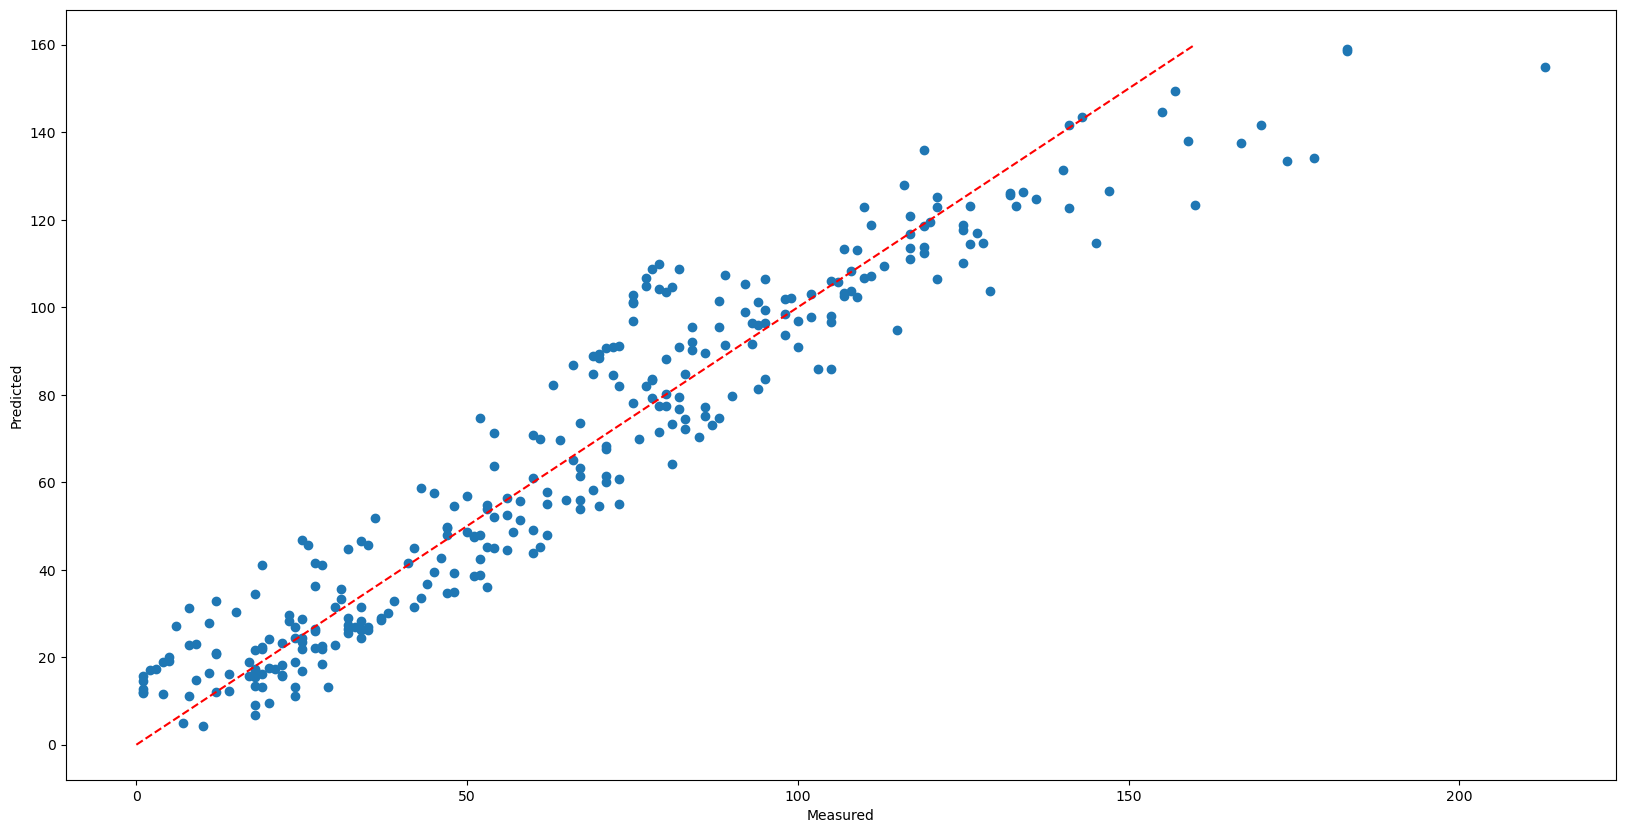

: 

In [44]:
plt.scatter(Y_test,lm.predict(X_test))
#plot line of 45 degrees
plt.plot([0,160],[0,160], '--k', color='red')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

In [36]:
#r2 score
from sklearn.metrics import r2_score
print(r2_score(Y_test,lm.predict(X_test)))


0.9090705167941919


In [37]:
RMSE = np.sqrt(np.sum((Y_test-lm.predict(X_test))**2)/len(Y_test))
print(RMSE)

12.757650698418828


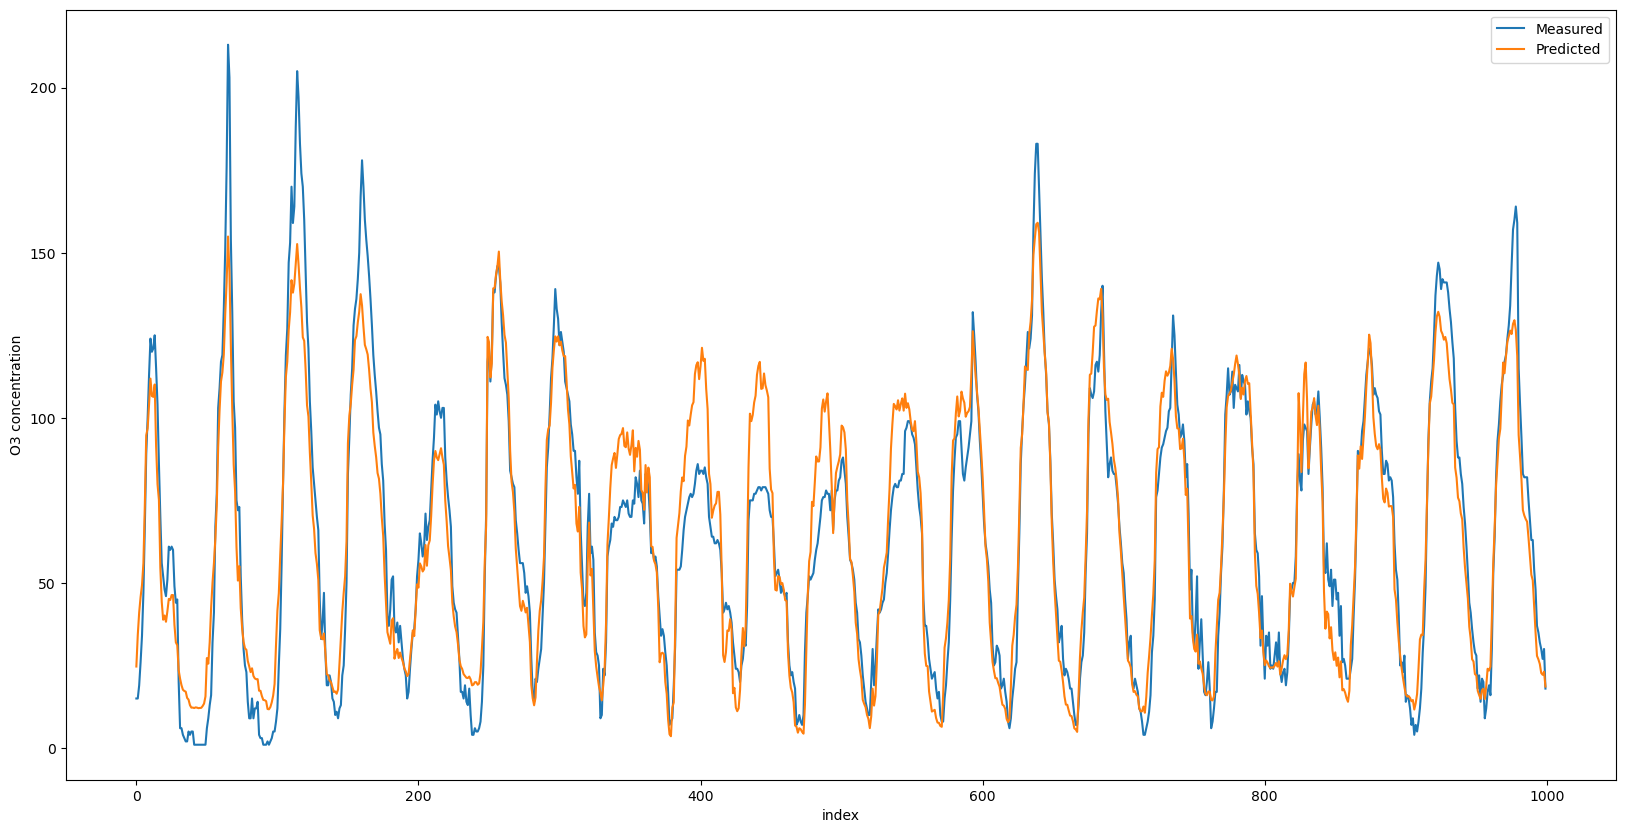

In [38]:
plt.plot(df['RefSt'])
#plot predition on all data, set the index to the date
plt.plot(lm.predict(df[['Sensor_O3','Temp','RelHum']]))
plt.legend(['Measured','Predicted'])
plt.xlabel('index')
plt.ylabel('O3 concentration')
#set dimensions of the plot
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

In [39]:
#calculate the RMSE of all the data
RMSE = np.sqrt(np.sum((df['RefSt']-lm.predict(df[['Sensor_O3','Temp','RelHum']]))**2)/len(df['RefSt']))
print(RMSE)
#calculate RMSE of just the Sensor_O3 data
RMSE = np.sqrt(np.sum((df['RefSt']-df['Sensor_O3'])**2)/len(df['RefSt']))
print(RMSE)

13.538287323342976
217.8177105348495


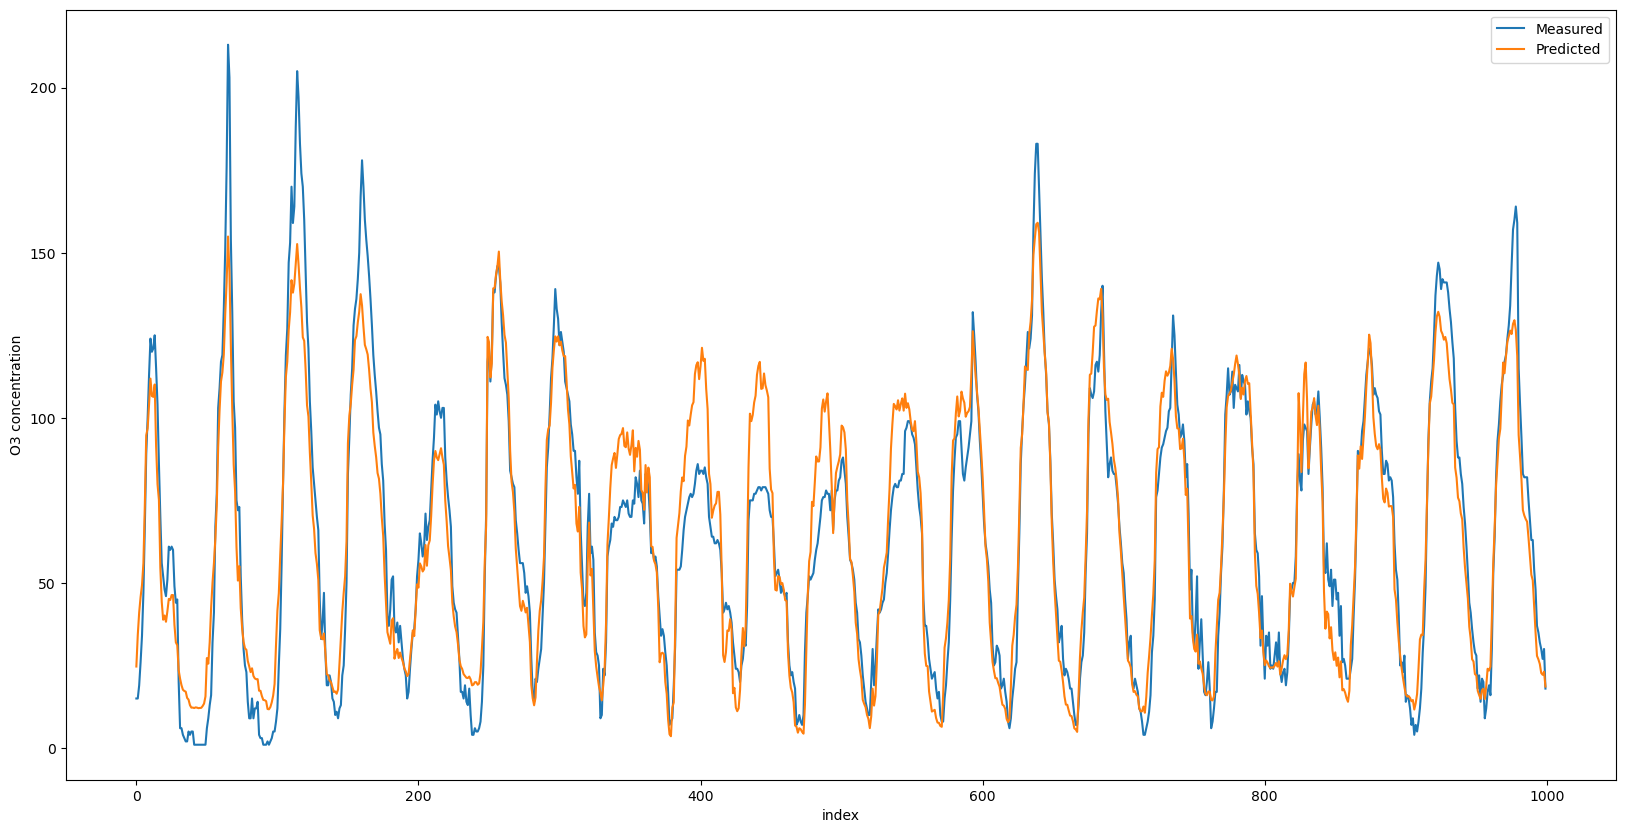

In [40]:
plt.plot(df['RefSt'])
#plot predition on all data, set the index to the date
plt.plot(lm.predict(X))
plt.legend(['Measured','Predicted'])
plt.xlabel('index')
plt.ylabel('O3 concentration')
#set dimensions of the plot
plt.rcParams["figure.figsize"] = (20,10)
plt.show()